# 02 - SVM Regression on Heart Disease Dataset

Simple notebook to perform SVM regression with different kernels and visualize regression lines.

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("✅ Regression libraries imported successfully")

✅ Regression libraries imported successfully


In [10]:
# Load heart disease dataset for regression
df = pd.read_csv('../data/raw/heart_disease.csv')

# Use real features for regression
X = df[['age', 'sex', 'trestbps', 'chol']].values  # Select 4 key features

# Create continuous target: cardiovascular risk score from multiple factors
risk_score = (
    df['age'] * 0.8 +
    df['sex'] * 10 +
    df['trestbps'] * 0.3 +
    df['chol'] * 0.1 +
    df['thalach'] * 0.2 +
    df['exang'] * 15
)

# Normalize to 0-100 scale
y = ((risk_score - risk_score.min()) / (risk_score.max() - risk_score.min())) * 100

print(f"✅ Regression dataset created: {X.shape[0]} patients")
print(f"📈 Risk scores range: {y.min():.1f} to {y.max():.1f}")
print(f"📈 Average risk score: {y.mean():.1f}")
print(f"📊 Features: Age, Sex, Blood Pressure, Cholesterol")

✅ Regression dataset created: 54 patients
📈 Risk scores range: 0.0 to 100.0
📈 Average risk score: 63.4
📊 Features: Age, Sex, Blood Pressure, Cholesterol


In [11]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

print(f"✅ Data prepared for regression:")
print(f"📈 Training set: {X_train.shape[0]} patients")
print(f"📈 Test set: {X_test.shape[0]} patients")
print(f"✅ Features standardized for SVR analysis")

✅ Data prepared for regression:
📈 Training set: 37 patients
📈 Test set: 17 patients
✅ Features standardized for SVR analysis


In [13]:
# Train SVM regression models with different kernels
kernels = ['linear', 'rbf']
results = {}

for kernel in kernels:
    print(f"\nTraining SVR with {kernel} kernel...")
    
    # Train model
    svr = SVR(kernel=kernel, C=1.0, epsilon=0.1)
    svr.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = svr.predict(X_train_scaled)
    y_pred_test = svr.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    results[kernel] = {
        'model': svr,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mse': test_mse,
        'y_pred': y_pred_test
    }
    
    print(f"✅ {kernel.upper()} SVR - R²: {test_r2:.3f}, MSE: {test_mse:.2f}")

print("\n✅ All regression models trained")


Training SVR with linear kernel...
✅ LINEAR SVR - R²: 0.957, MSE: 29.69

Training SVR with rbf kernel...
✅ RBF SVR - R²: 0.123, MSE: 612.41

✅ All regression models trained


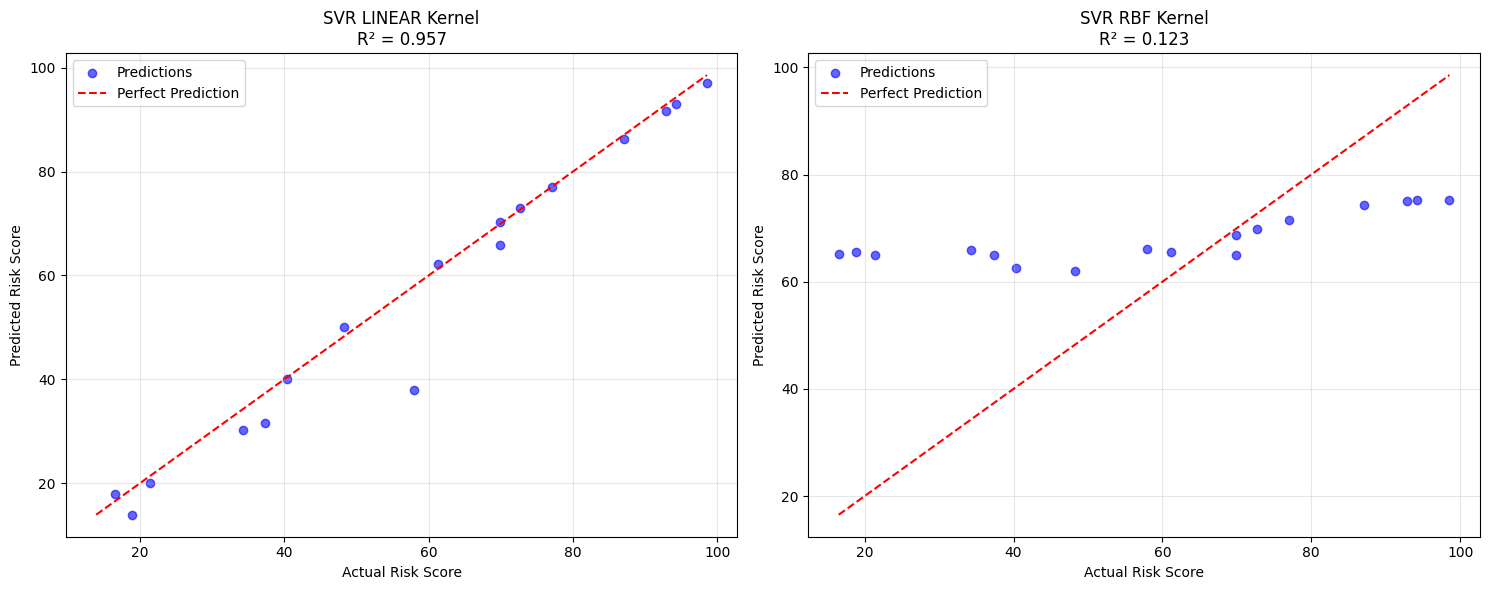

✅ Regression visualization completed


In [14]:
# Visualize regression results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, kernel in enumerate(kernels):
    ax = axes[i]
    
    # Plot actual vs predicted
    y_pred = results[kernel]['y_pred']
    
    ax.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
    
    # Plot perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    ax.set_xlabel('Actual Risk Score')
    ax.set_ylabel('Predicted Risk Score')
    ax.set_title(f'SVR {kernel.upper()} Kernel\nR² = {results[kernel]["test_r2"]:.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Regression visualization completed")

In [15]:
# Model comparison
print("\n🏆 SVM Regression Model Comparison:")
print("=" * 50)

for kernel in kernels:
    r2 = results[kernel]['test_r2']
    mse = results[kernel]['test_mse']
    print(f"{kernel.upper()} SVR:")
    print(f"  • R² Score: {r2:.3f}")
    print(f"  • MSE: {mse:.2f}")
    print(f"  • Performance: {'Good' if r2 > 0.7 else 'Moderate' if r2 > 0.5 else 'Poor'}")
    print()

# Best model
best_kernel = max(kernels, key=lambda k: results[k]['test_r2'])
print(f"🏅 Best performing model: {best_kernel.upper()} SVR")
print(f"✅ SVM Regression analysis completed")


🏆 SVM Regression Model Comparison:
LINEAR SVR:
  • R² Score: 0.957
  • MSE: 29.69
  • Performance: Good

RBF SVR:
  • R² Score: 0.123
  • MSE: 612.41
  • Performance: Poor

🏅 Best performing model: LINEAR SVR
✅ SVM Regression analysis completed
